# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint as pprint
import json
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

weather_api_key

'491ad461c181a9d54d641a244d3bfa40'

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# # Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="
units = "&units=metric"

# # Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

   # Create endpoint URL with each city
    city_url = f"{url}{city}{units}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try: 
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        
    # If an error is experienced, skip the city
    except:
        print(f"{city} not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ciudad bolivar
Processing Record 2 of Set 1 | olyokminsk
Processing Record 3 of Set 1 | karratha
Processing Record 4 of Set 1 | iskateley
Processing Record 5 of Set 1 | fuvahmulah
fuvahmulah not found. Skipping...
Processing Record 6 of Set 1 | figuig (centre)
Processing Record 7 of Set 1 | kiri buru
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | badger
Processing Record 10 of Set 1 | sao jose da coroa grande
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | papatowai
Processing Record 13 of Set 1 | devinuwara
devinuwara not found. Skipping...
Processing Record 14 of Set 1 | tacna
Processing Record 15 of Set 1 | acarau
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | hugo
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | keflavik
Processing Record 20 of Set 1 | soledad de doblado
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ciudad bolivar,8.1222,-63.5497,32.73,54,100,3.10,VE,1698421992
1,olyokminsk,60.3736,120.4264,2.60,89,100,2.33,RU,1698421992
2,karratha,-20.7377,116.8463,27.74,69,13,2.90,AU,1698421993
3,iskateley,67.6803,53.1512,-11.66,100,36,1.79,RU,1698421994
4,figuig (centre),32.1089,-1.2286,27.46,16,69,3.97,MA,1698421995


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ciudad bolivar,8.1222,-63.5497,32.73,54,100,3.10,VE,1698421992
1,olyokminsk,60.3736,120.4264,2.60,89,100,2.33,RU,1698421992
2,karratha,-20.7377,116.8463,27.74,69,13,2.90,AU,1698421993
3,iskateley,67.6803,53.1512,-11.66,100,36,1.79,RU,1698421994
4,figuig (centre),32.1089,-1.2286,27.46,16,69,3.97,MA,1698421995


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

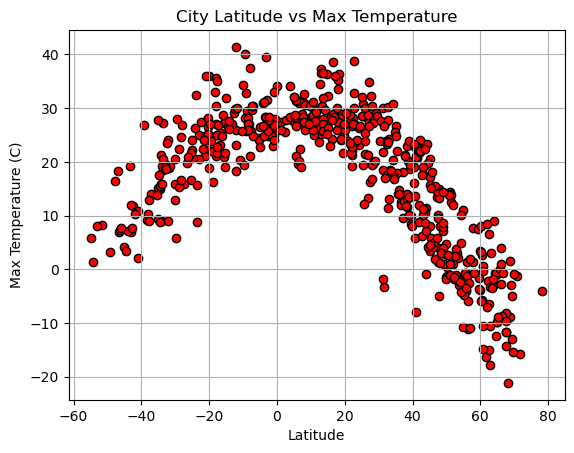

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, color= "red", edgecolors="black")



# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("City Latitude vs Max Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

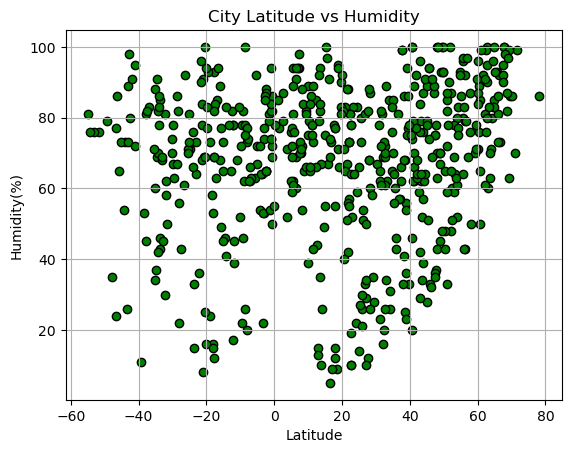

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, color="green", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title("City Latitude vs Humidity")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

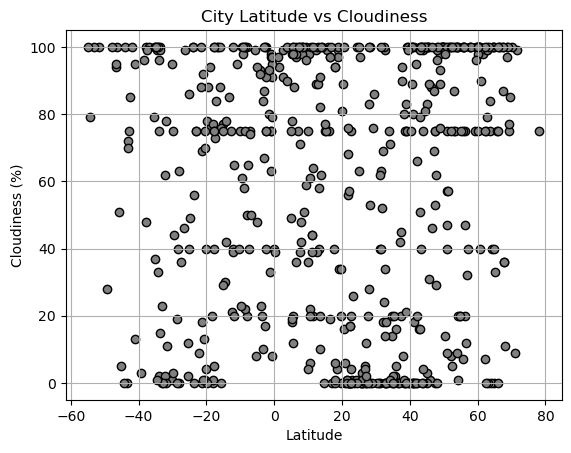

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, color="gray", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs Cloudiness")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

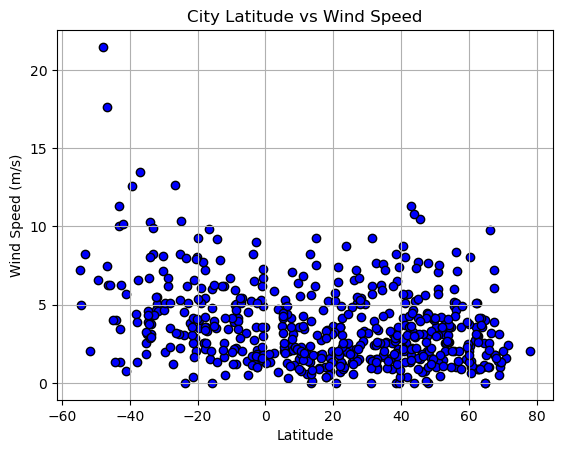

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, color="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("City Latitude vs Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = (city_data_df[city_data_df["Lat"]>= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ciudad bolivar,8.1222,-63.5497,32.73,54,100,3.10,VE,1698421992
1,olyokminsk,60.3736,120.4264,2.60,89,100,2.33,RU,1698421992
3,iskateley,67.6803,53.1512,-11.66,100,36,1.79,RU,1698421994
4,figuig (centre),32.1089,-1.2286,27.46,16,69,3.97,MA,1698421995
5,kiri buru,22.0833,85.3500,19.31,57,0,0.71,IN,1698421995


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = (city_data_df[city_data_df["Lat"] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,karratha,-20.7377,116.8463,27.74,69,13,2.90,AU,1698421993
8,sao jose da coroa grande,-8.8978,-35.1478,29.42,62,58,5.91,BR,1698421997
9,port-aux-francais,-49.3500,70.2167,3.24,79,28,6.58,TF,1698421972
10,papatowai,-46.5619,169.4708,6.90,77,94,7.48,NZ,1698421998
11,tacna,-18.0056,-70.2483,21.11,53,0,2.57,PE,1698421999


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7613509970035911


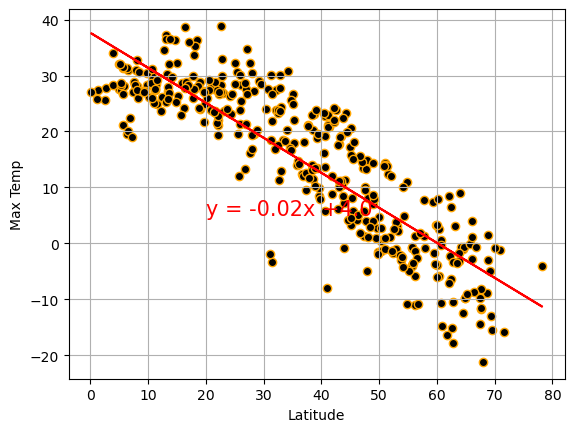

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values, color= "black", edgecolors="orange")
plt.grid()
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.5688039573865599


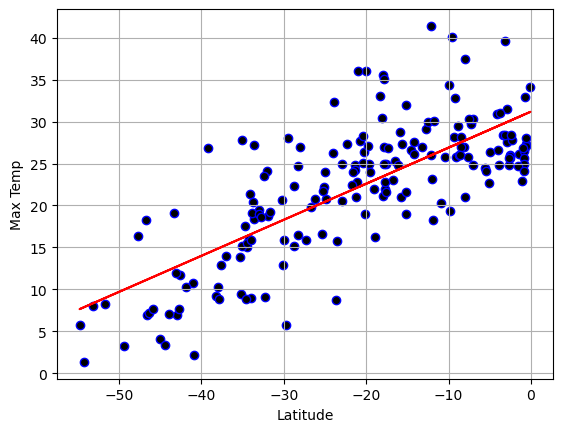

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values, color= "black", edgecolors="blue")
plt.grid()
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.04555520437696109


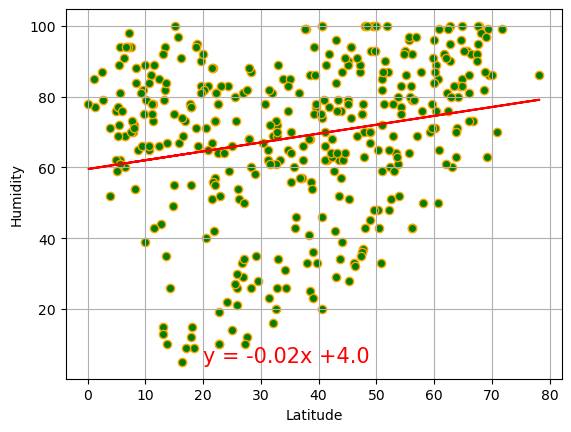

In [19]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values, color= "green", edgecolors="orange")
plt.grid()
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

The r-value is: 6.916363256784044e-05


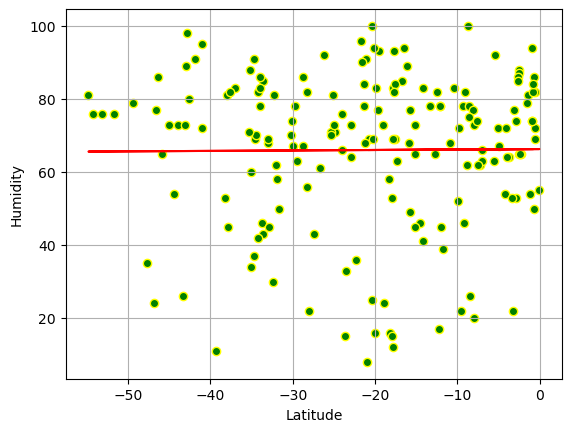

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values, color= "green", edgecolors="yellow")
plt.grid()
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.019985970035743265


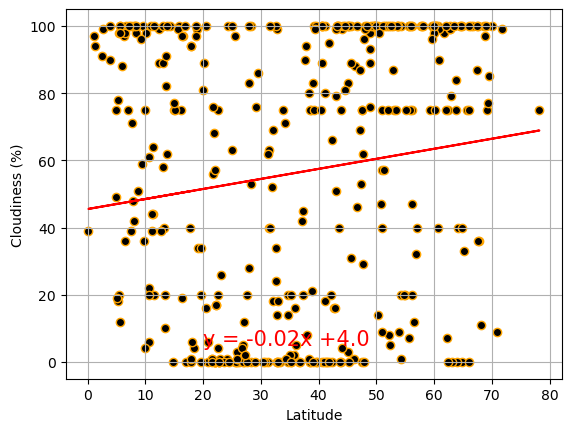

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values, color= "black", edgecolors="orange")
plt.grid()
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

The r-value is: 0.019985970035743265


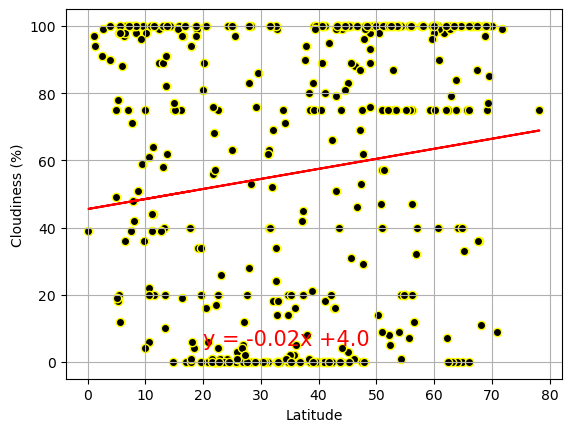

In [22]:
# Southern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values, color= "black", edgecolors="yellow")
plt.grid()
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00018572554269504453


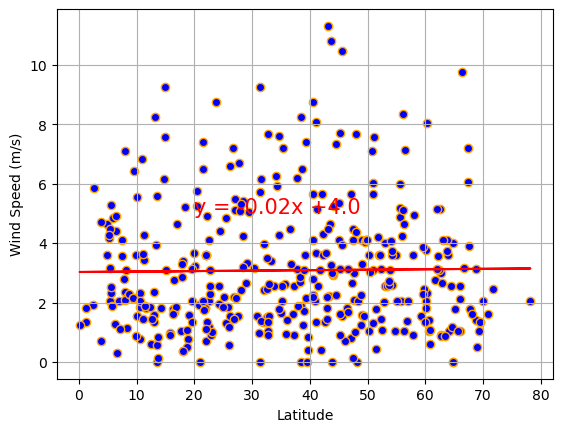

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values, color= "blue", edgecolors="orange")
plt.grid()
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

The r-value is: 0.12156584557862289


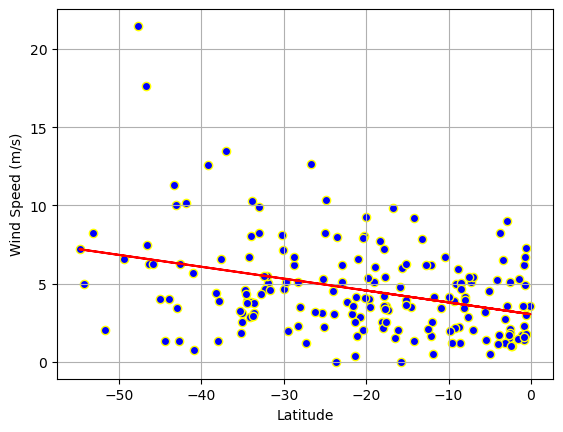

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values, color= "blue", edgecolors="yellow")
plt.grid()
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE